11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
938/938 [==============================] - 69s 64ms/step - loss: 0.4121 - accuracy: 0.8655 - val_loss: 0.1627 - val_accuracy: 0.9449
Epoch 2/5
938/938 [==============================] - 53s 56ms/step - loss: 0.1202 - accuracy: 0.9635 - val_loss: 0.0957 - val_accuracy: 0.9679
Epoch 3/5
938/938 [==============================] - 51s 55ms/step - loss: 0.0843 - accuracy: 0.9745 - val_loss: 0.0805 - val_accuracy: 0.9753
Epoch 4/5
938/938 [==============================] - 52s 55ms/step - loss: 0.0657 - accuracy: 0.9794 - val_loss: 0.0628 - val_accuracy: 0.9806
Epoch 5/5
938/938 [==============================] - 53s 56ms/step - loss: 0.0522 - accuracy: 0.9839 - val_loss: 0.0592 - val_accuracy: 0.9807


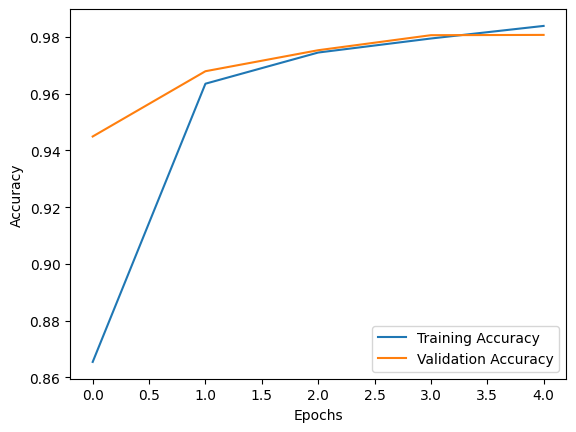

Test Accuracy: 0.9807000160217285


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the input data and one-hot encode the labels
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Define the LSTM model
model = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_acc}')